In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [12]:
V1 = 19.947983193277313
V2 = 19.971008403361346
V3 = 19.9946218487395


In [13]:
V4 = 19.948001888828237
V5 = 19.970987394957984
V6 = 19.9946218487395


In [15]:
piezo_voltge_diff_1 = V2 - V1
piezo_voltge_diff_2 = V3 - V2
piezo_voltge_diff_3 = V5 - V4
piezo_voltge_diff_4 = V6 - V5

In [21]:
average_piezo_voltage_diff = np.average([piezo_voltge_diff_1, piezo_voltge_diff_2, piezo_voltge_diff_3, piezo_voltge_diff_4]) # in Volts
average_piezo_voltage_diff

0.023314653843361732

In [22]:
MHz_per_volt = 5 / average_piezo_voltage_diff  # MHz per Volt
MHz_per_volt

214.45739806356275

In [23]:
Vpp = 0.0115 # Vpp in Volts
Freq_pp_MHz = MHz_per_volt * Vpp # Frequency peak-to-peak in MHz
Freq_pp_MHz

2.4662600777309716

In [24]:
scan_frequency = 100 #Hz
scan_period = 1 / scan_frequency  # in seconds
scan_period

0.01

In [26]:
freq_per_second_MHz = 2 * Freq_pp_MHz / scan_period  # in MHz/s
freq_per_second_MHz

493.2520155461943

In [41]:
df = pd.read_csv('scope_1.csv', header=1)

In [42]:
df

,second,Volt
0,-0.001,0.259244
1,-0.001,0.259244
2,-0.001,0.267284
3,-0.001,0.267284
4,-0.001,0.259244
...,...,...
62495,0.001,0.251204
62496,0.001,0.259244
62497,0.001,0.259244
62498,0.001,0.259244


In [44]:
time = df.iloc[:, 0].values  # Time in seconds
time = time - time[0]  # Normalize time to start at zero
voltage = df.iloc[:, 1].values  # Voltage in Volts

In [45]:
time

array([0.000000e+00, 3.200000e-08, 6.400000e-08, ..., 1.999904e-03,
       1.999936e-03, 1.999968e-03])

In [46]:
voltage

array([0.25924372, 0.25924372, 0.26728392, ..., 0.25924372, 0.25924372,
       0.26728392])

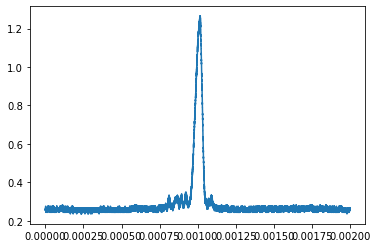

In [47]:
plt.plot(time, voltage, label='Voltage Signal')

In [49]:
max_voltage_index = np.argmax(voltage)
max_voltage_index

31726

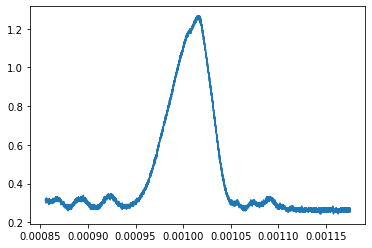

In [56]:
plot_range = 5000 # in index points
plt.plot(time[max_voltage_index-plot_range:max_voltage_index+plot_range], voltage[max_voltage_index-plot_range:max_voltage_index+plot_range], label='Max Voltage')

 # Scope 1

Fitted FWHM (time): 4.365831e-05 s
Fitted FWHM (frequency): 0.022 MHz
Finesse: 69655.51


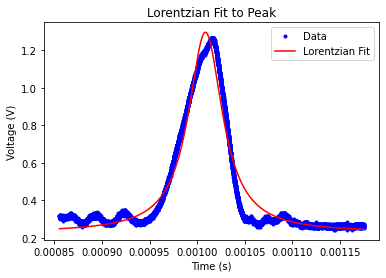

In [62]:
# Define Lorentzian function
def lorentzian(x, x0, gamma, a, d):
    return a * gamma**2 / ((x - x0)**2 + gamma**2) + d

# Select the data range around the peak for fitting
fit_time = time[max_voltage_index-plot_range:max_voltage_index+plot_range]
fit_voltage = voltage[max_voltage_index-plot_range:max_voltage_index+plot_range]

# Initial guess for [x0, gamma, a, d]
x0_guess = fit_time[np.argmax(fit_voltage)]
gamma_guess = (fit_time[-1] - fit_time[0]) / 10
a_guess = np.max(fit_voltage) - np.min(fit_voltage)
d_guess = np.min(fit_voltage)
p0 = [x0_guess, gamma_guess, a_guess, d_guess]

# Fit Lorentzian
popt, pcov = curve_fit(lorentzian, fit_time, fit_voltage, p0=p0)
x0_fit, gamma_fit, a_fit, d_fit = popt

# Calculate FWHM in time units
FWHM_time = 2 * gamma_fit

# Convert FWHM from time to MHz using freq_per_second_MHz
FWHM_MHz = FWHM_time * freq_per_second_MHz

# Calculate the finesse as well
FSR = 1.5e9  # FSR in Hz
Finesse = FSR / (FWHM_MHz * 1e6)  # Convert MHz to Hz for FSR

print(f"Fitted FWHM (time): {FWHM_time:.6e} s")
print(f"Fitted FWHM (frequency): {FWHM_MHz:.3f} MHz")
print(f"Finesse: {Finesse:.2f}")

# Plot the fit
plt.plot(fit_time, fit_voltage, 'b.', label='Data')
plt.plot(fit_time, lorentzian(fit_time, *popt), 'r-', label='Lorentzian Fit')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Lorentzian Fit to Peak')
plt.show()

# Scope 3

Fitted FWHM (time): 4.884009e-05 s
Fitted FWHM (frequency): 0.024 MHz
Finesse: 62265.27


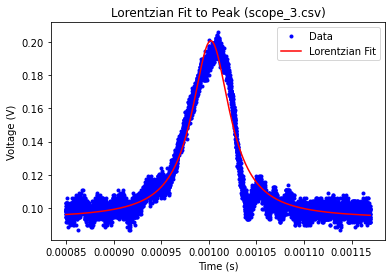

In [63]:
# Load new data from scope_3.csv
df3 = pd.read_csv('scope_3.csv', header=1)

# Extract and normalize time and voltage
time3 = df3.iloc[:, 0].values
time3 = time3 - time3[0]
voltage3 = df3.iloc[:, 1].values

# Find max voltage index
max_voltage_index3 = np.argmax(voltage3)

# Use the same plot range as before
fit_time3 = time3[max_voltage_index3-plot_range:max_voltage_index3+plot_range]
fit_voltage3 = voltage3[max_voltage_index3-plot_range:max_voltage_index3+plot_range]

# Initial guess for Lorentzian fit
x0_guess3 = fit_time3[np.argmax(fit_voltage3)]
gamma_guess3 = (fit_time3[-1] - fit_time3[0]) / 10
a_guess3 = np.max(fit_voltage3) - np.min(fit_voltage3)
d_guess3 = np.min(fit_voltage3)
p0_3 = [x0_guess3, gamma_guess3, a_guess3, d_guess3]

# Fit Lorentzian
popt3, pcov3 = curve_fit(lorentzian, fit_time3, fit_voltage3, p0=p0_3)
x0_fit3, gamma_fit3, a_fit3, d_fit3 = popt3

# Calculate FWHM in time units
FWHM_time3 = 2 * gamma_fit3

# Convert FWHM from time to MHz using freq_per_second_MHz
FWHM_MHz3 = FWHM_time3 * freq_per_second_MHz

# Calculate finesse
Finesse3 = FSR / (FWHM_MHz3 * 1e6)

print(f"Fitted FWHM (time): {FWHM_time3:.6e} s")
print(f"Fitted FWHM (frequency): {FWHM_MHz3:.3f} MHz")
print(f"Finesse: {Finesse3:.2f}")

# Plot the fit
plt.plot(fit_time3, fit_voltage3, 'b.', label='Data')
plt.plot(fit_time3, lorentzian(fit_time3, *popt3), 'r-', label='Lorentzian Fit')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Lorentzian Fit to Peak (scope_3.csv)')
plt.show()

# Scope 5

Fitted FWHM (time): 1.051857e-04 s
Fitted FWHM (frequency): 0.052 MHz
Finesse: 28911.16


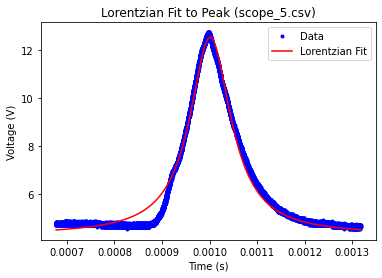

In [90]:
# Load new data from scope_5.csv
df5 = pd.read_csv('scope_5.csv', header=1)

# Extract and normalize time and voltage
time5 = df5.iloc[:, 0].values
time5 = time5 - time5[0]
voltage5 = df5.iloc[:, 1].values

# Find max voltage index
max_voltage_index5 = np.nanargmax(voltage5)

plot_range = 10000

# Use the same plot range as before
fit_time5 = time5[max_voltage_index5-plot_range:max_voltage_index5+plot_range]
fit_voltage5 = voltage5[max_voltage_index5-plot_range:max_voltage_index5+plot_range]

# Initial guess for Lorentzian fit
x0_guess5 = fit_time5[np.argmax(fit_voltage5)]
gamma_guess5 = (fit_time5[-1] - fit_time5[0]) / 10
a_guess5 = np.max(fit_voltage5) - np.min(fit_voltage5)
d_guess5 = np.min(fit_voltage5)
p0_5 = [x0_guess5, gamma_guess5, a_guess5, d_guess5]

# Fit Lorentzian
popt5, pcov5 = curve_fit(lorentzian, fit_time5, fit_voltage5, p0=p0_5)
x0_fit5, gamma_fit5, a_fit5, d_fit5 = popt5

# Calculate FWHM in time units
FWHM_time5 = 2 * gamma_fit5

# Convert FWHM from time to MHz using freq_per_second_MHz
FWHM_MHz5 = FWHM_time5 * freq_per_second_MHz

# Calculate finesse
Finesse5 = FSR / (FWHM_MHz5 * 1e6)

print(f"Fitted FWHM (time): {FWHM_time5:.6e} s")
print(f"Fitted FWHM (frequency): {FWHM_MHz5:.3f} MHz")
print(f"Finesse: {Finesse5:.2f}")

# Plot the fit
plt.plot(fit_time5, fit_voltage5, 'b.', label='Data')
plt.plot(fit_time5, lorentzian(fit_time5, *popt5), 'r-', label='Lorentzian Fit')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Lorentzian Fit to Peak (scope_5.csv)')
plt.show()